## SVD on Different Data 

### Load Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Let us construct a matrix and perform SVD on the matrix

In [2]:
A = np.array([[2,4],[1,3],[0,0],[0,0]])

In [3]:
A

array([[2, 4],
       [1, 3],
       [0, 0],
       [0, 0]])

#### Compute SVD of matrix A 

In [4]:
U, D, V = np.linalg.svd(A)   #linalg = linearalgebra

#### Look into the individual matrix

In [5]:
U

array([[-0.81741556, -0.57604844,  0.        ,  0.        ],
       [-0.57604844,  0.81741556,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  1.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  1.        ]])

In [6]:
D

array([5.4649857 , 0.36596619])

In [7]:
V

array([[-0.40455358, -0.9145143 ],
       [-0.9145143 ,  0.40455358]])

### Let us construct a Movie matrix

In [8]:
import pandas as pd

MovieName = ['M1', 'M2', 'M3', 'M4','M5']
usersName = ['user1', 'user2', 'user3', 'user4', 'user5','user6','user7']

In [9]:
Movie_user = pd.DataFrame([[1,1,1,0,0],
                           [3,3,3,0,0],
                           [4,4,4,0,0],
                           [5,5,5,0,0],
                           [0,2,0,4,4],
                           [0,0,0,5,5],
                           [0,1,0,2,2]],
                          index = usersName,
                          columns = MovieName)

#### The dataframe has ratings of users for different movies.Each of the user rates different movies. 

In [10]:
Movie_user

,M1,M2,M3,M4,M5
user1,1,1,1,0,0
user2,3,3,3,0,0
user3,4,4,4,0,0
user4,5,5,5,0,0
user5,0,2,0,4,4
user6,0,0,0,5,5
user7,0,1,0,2,2


#### The singular value decomposition can be calculated for the above dataframe songs_user using svd function in numpy

In [11]:
import numpy as np

U, sigma, V = np.linalg.svd(Movie_user)

In [12]:
np.round(U,decimals=2)

array([[-0.14,  0.02,  0.01,  0.99, -0.  , -0.  ,  0.  ],
       [-0.41,  0.07,  0.03, -0.06, -0.89,  0.19,  0.  ],
       [-0.55,  0.09,  0.04, -0.08,  0.42,  0.71,  0.  ],
       [-0.69,  0.12,  0.05, -0.1 ,  0.19, -0.68,  0.  ],
       [-0.15, -0.59, -0.65, -0.  ,  0.  , -0.  , -0.45],
       [-0.07, -0.73,  0.68,  0.  , -0.  ,  0.  ,  0.  ],
       [-0.08, -0.3 , -0.33, -0.  , -0.  , -0.  ,  0.89]])

In [13]:
sigma

array([1.24810147e+01, 9.50861406e+00, 1.34555971e+00, 1.84716760e-16,
       9.74452038e-33])

In [14]:
np.round((V),decimals=2)

array([[-0.56, -0.59, -0.56, -0.09, -0.09],
       [ 0.13, -0.03,  0.13, -0.7 , -0.7 ],
       [ 0.41, -0.8 ,  0.41,  0.09,  0.09],
       [-0.71,  0.  ,  0.71, -0.  ,  0.  ],
       [-0.  ,  0.  , -0.  ,  0.71, -0.71]])

Recall that a⃗ i=U∗Σ∗v⃗ i, that is each column v⃗ i of V defines the entries in that column, a⃗ i, of our data matrix, A. Let's label V with the identities of the posts using a DataFrame:

In [16]:
V_df = pd.DataFrame(V, columns=MovieName)
V_df

,M1,M2,M3,M4,M5
0,-0.562258,-5.928599e-01,-5.622584e-01,-9.013354e-02,-9.013354e-02
1,0.126641,-2.877058e-02,1.266414e-01,-6.953762e-01,-6.953762e-01
2,0.409667,-8.047915e-01,4.096675e-01,9.125710e-02,9.125710e-02
3,-0.707107,3.729415e-16,7.071068e-01,-2.842422e-17,2.708693e-17
4,-0.000000,1.276874e-16,-1.276874e-16,7.071068e-01,-7.071068e-01


In [17]:
A_approx = np.matrix(U[:, :2]) * np.diag(sigma[:2]) * np.matrix(V[:2, :])

In [18]:
print(A_approx)

[[ 9.94042024e-01  1.01170444e+00  9.94042024e-01 -1.32719254e-03
  -1.32719254e-03]
 [ 2.98212607e+00  3.03511332e+00  2.98212607e+00 -3.98157762e-03
  -3.98157762e-03]
 [ 3.97616810e+00  4.04681776e+00  3.97616810e+00 -5.30877016e-03
  -5.30877016e-03]
 [ 4.97021012e+00  5.05852220e+00  4.97021012e+00 -6.63596269e-03
  -6.63596269e-03]
 [ 3.60313300e-01  1.29216474e+00  3.60313300e-01  4.08026301e+00
   4.08026301e+00]
 [-3.73850664e-01  7.34429403e-01 -3.73850664e-01  4.91672142e+00
   4.91672142e+00]
 [ 1.80156650e-01  6.46082370e-01  1.80156650e-01  2.04013151e+00
   2.04013151e+00]]


In [21]:
print("\nOrginal songs data:\n")
print(Movie_user)
print("\nA calculated using only the first two components:\n")
print(pd.DataFrame(A_approx, index=usersName, columns=MovieName))
print("\nError from actual value:\n")
print(Movie_user - A_approx)


Orginal songs data:

       M1  M2  M3  M4  M5
user1   1   1   1   0   0
user2   3   3   3   0   0
user3   4   4   4   0   0
user4   5   5   5   0   0
user5   0   2   0   4   4
user6   0   0   0   5   5
user7   0   1   0   2   2

A calculated using only the first two components:

             M1        M2        M3        M4        M5
user1  0.994042  1.011704  0.994042 -0.001327 -0.001327
user2  2.982126  3.035113  2.982126 -0.003982 -0.003982
user3  3.976168  4.046818  3.976168 -0.005309 -0.005309
user4  4.970210  5.058522  4.970210 -0.006636 -0.006636
user5  0.360313  1.292165  0.360313  4.080263  4.080263
user6 -0.373851  0.734429 -0.373851  4.916721  4.916721
user7  0.180157  0.646082  0.180157  2.040132  2.040132

Error from actual value:

             M1        M2        M3        M4        M5
user1  0.005958 -0.011704  0.005958  0.001327  0.001327
user2  0.017874 -0.035113  0.017874  0.003982  0.003982
user3  0.023832 -0.046818  0.023832  0.005309  0.005309
user4  0.029790 -0.

In [22]:
print("Error:")
print((Movie_user - A_approx).sum().sum())

Error:
-0.04289030281365584


## Image Data 

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import time

from PIL import Image

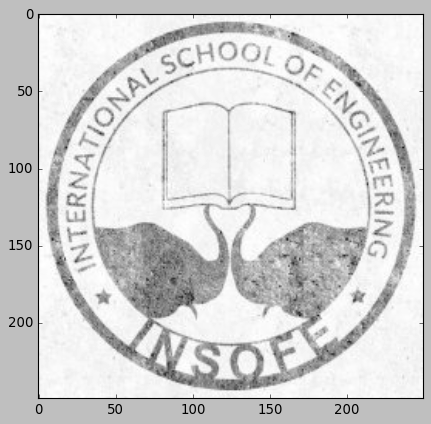

In [2]:
plt.style.use('classic')
img = Image.open('insofe-emblum.jpg')

# convert image to grayscale
imggray = img.convert('L')

# convert to numpy array
imgmat = np.array(list(imggray.getdata()), float)

# Reshape according to orginal image dimensions
imgmat.shape = (imggray.size[1], imggray.size[0])

# Plot image
plt.figure(figsize=(9, 6))
plt.imshow(imgmat, cmap='gray')
plt.show()

In [6]:
imgmat

array([[255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.],
       ...,
       [255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.]])

### We will see how SVD will work on this insofe emblem. 

In [7]:
U, D, V = np.linalg.svd(imgmat)

In [8]:
imgmat.shape

(226, 223)

In [9]:
U.shape

(226, 226)

In [10]:
np.round(D, decimals=2)

array([4.596867e+04, 9.448980e+03, 6.514430e+03, 4.458160e+03,
       4.324650e+03, 3.170750e+03, 2.907500e+03, 2.808790e+03,
       2.715490e+03, 2.596230e+03, 2.425080e+03, 2.242830e+03,
       2.177560e+03, 1.980850e+03, 1.925580e+03, 1.745360e+03,
       1.622460e+03, 1.607740e+03, 1.575460e+03, 1.431670e+03,
       1.379900e+03, 1.314520e+03, 1.283680e+03, 1.204650e+03,
       1.188630e+03, 1.147720e+03, 1.101910e+03, 1.083180e+03,
       1.063750e+03, 1.014790e+03, 1.006660e+03, 9.595700e+02,
       9.456400e+02, 9.123000e+02, 8.814000e+02, 8.673100e+02,
       8.462100e+02, 8.381400e+02, 7.961200e+02, 7.804200e+02,
       7.587800e+02, 7.497100e+02, 7.412300e+02, 7.264600e+02,
       7.030600e+02, 6.923600e+02, 6.731300e+02, 6.600200e+02,
       6.410800e+02, 6.318200e+02, 6.100300e+02, 6.043300e+02,
       5.834000e+02, 5.760000e+02, 5.593900e+02, 5.483600e+02,
       5.428600e+02, 5.330300e+02, 5.106600e+02, 5.010000e+02,
       4.915600e+02, 4.870300e+02, 4.767700e+02, 4.6717

In [11]:
V.shape

(223, 223)

We can reconstruct the image from few components

In this example, we have reconstructed the 249px by 250px image from two singular values.

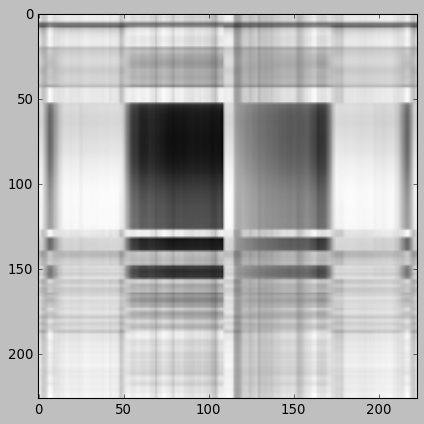

In [12]:
reconstimg = np.matrix(U[:, :2]) * np.diag(D[:2]) * np.matrix(V[:2, :])
plt.imshow(reconstimg,cmap='gray')
plt.show()

We will now draw the reconstruction using different number of singular values.

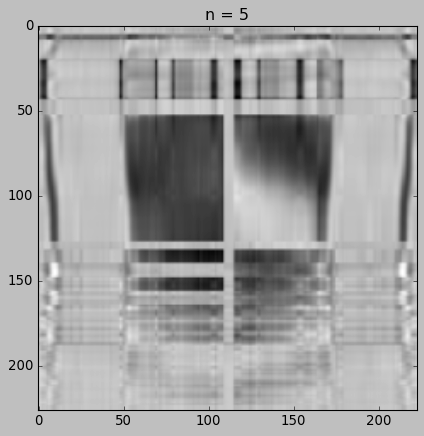

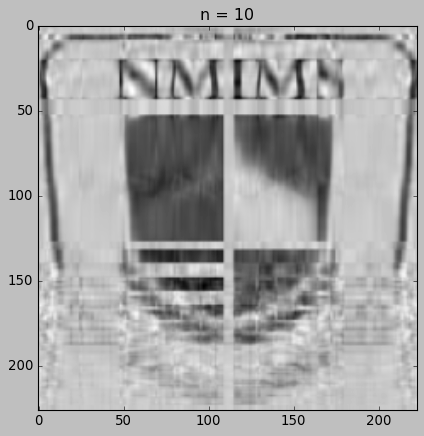

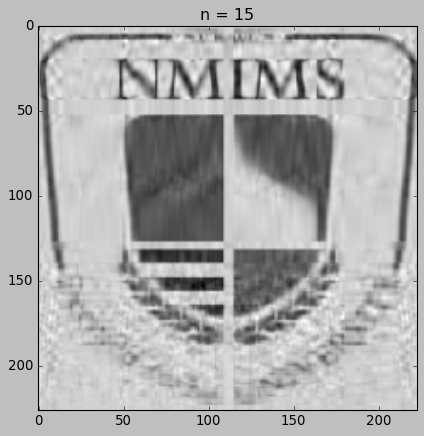

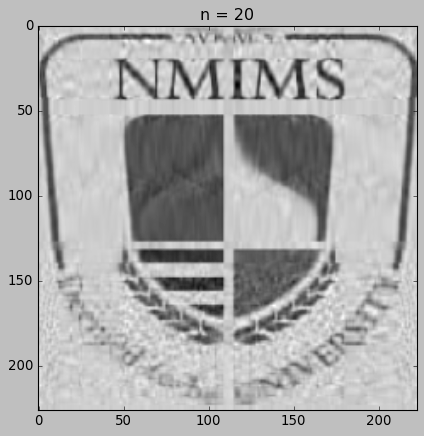

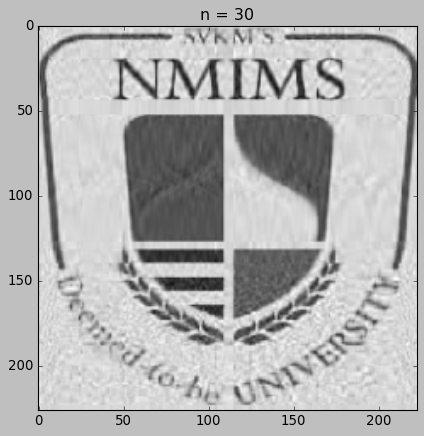

In [13]:
for i in [5, 10, 15, 20, 30]:
    reconstimg = np.matrix(U[:, :i]) * np.diag(D[:i]) * np.matrix(V[:i, :])
    plt.imshow(reconstimg,cmap='gray')
    title = "n = %s" % i
    plt.title(title)
    plt.show()